In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups

In [32]:
def plot_top_words(model, feature_names, n_top_words, title, m, n, h):

    fig, axes = plt.subplots(m, n, figsize=(20, h), sharex=True)
    axes = axes.flatten()
    
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind] / np.sum(topic[top_features_ind])

        ax = axes[topic_idx]
        bars = ax.barh(top_features, weights, height=0.5)
        ax.bar_label(bars)
        ax.set_title(f'Topic {topic_idx +1}', fontdict={'fontsize': 10})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=10)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=20)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

In [33]:
data, _ = fetch_20newsgroups(shuffle=True, random_state=11, remove=("headers", "footers", "quotes"), return_X_y=True)

In [34]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(data)
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

### NMF

k=10

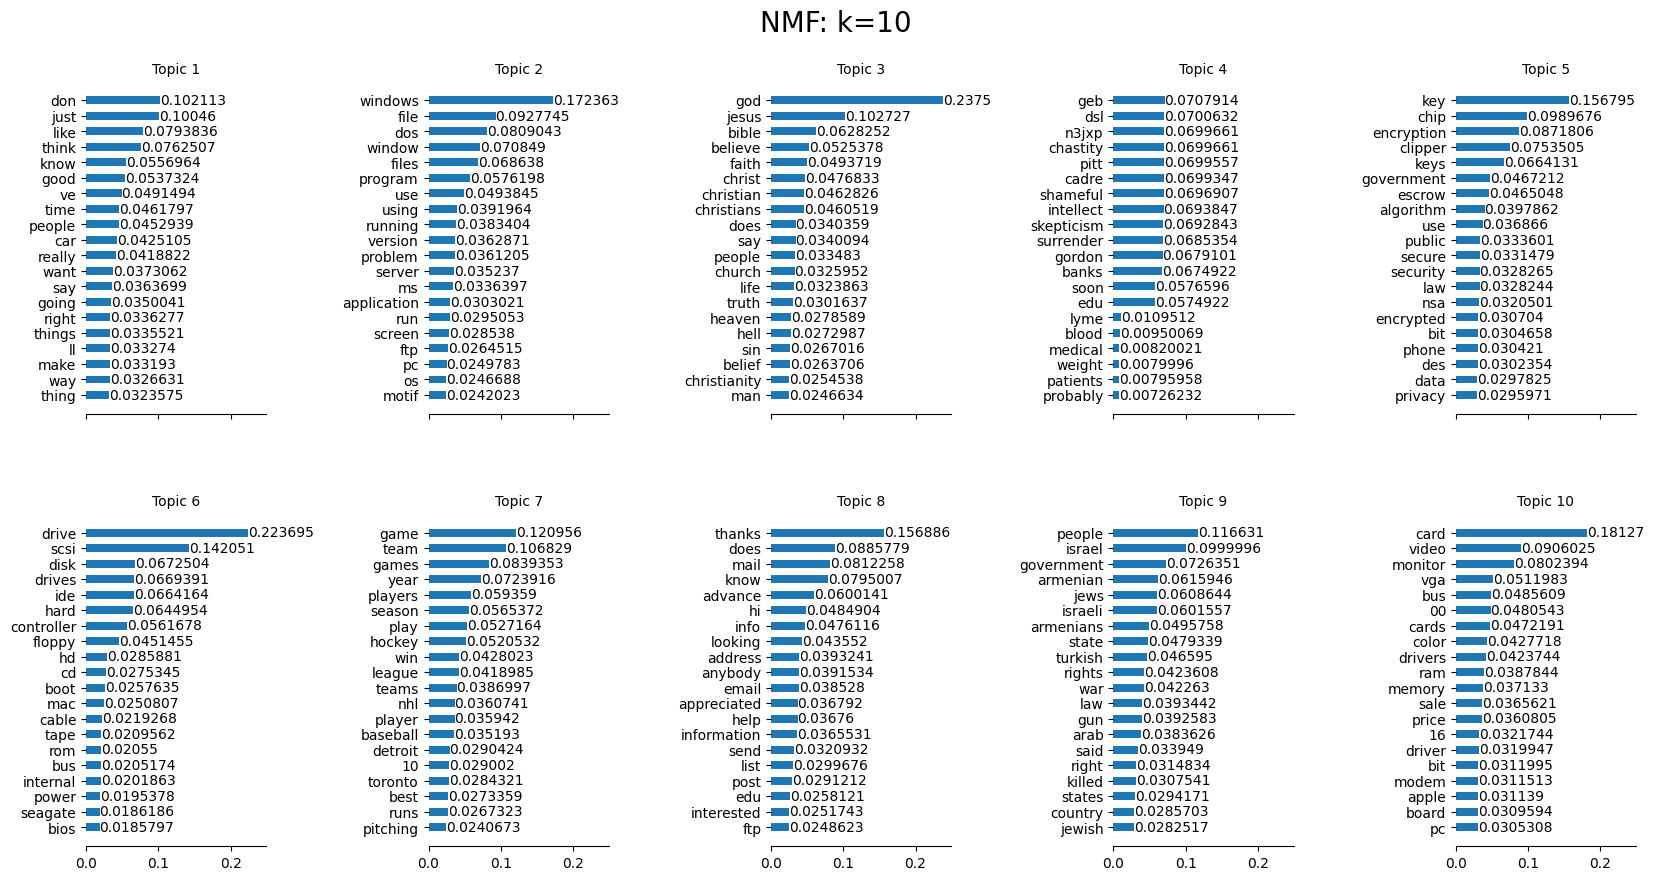

In [35]:
num_topics = 10
nmf = NMF(n_components=num_topics, random_state=11, beta_loss="frobenius").fit(tfidf)
plot_top_words(nmf, tfidf_feature_names, 20, 'NMF: k=10', 2 , 5, 9)

k=20

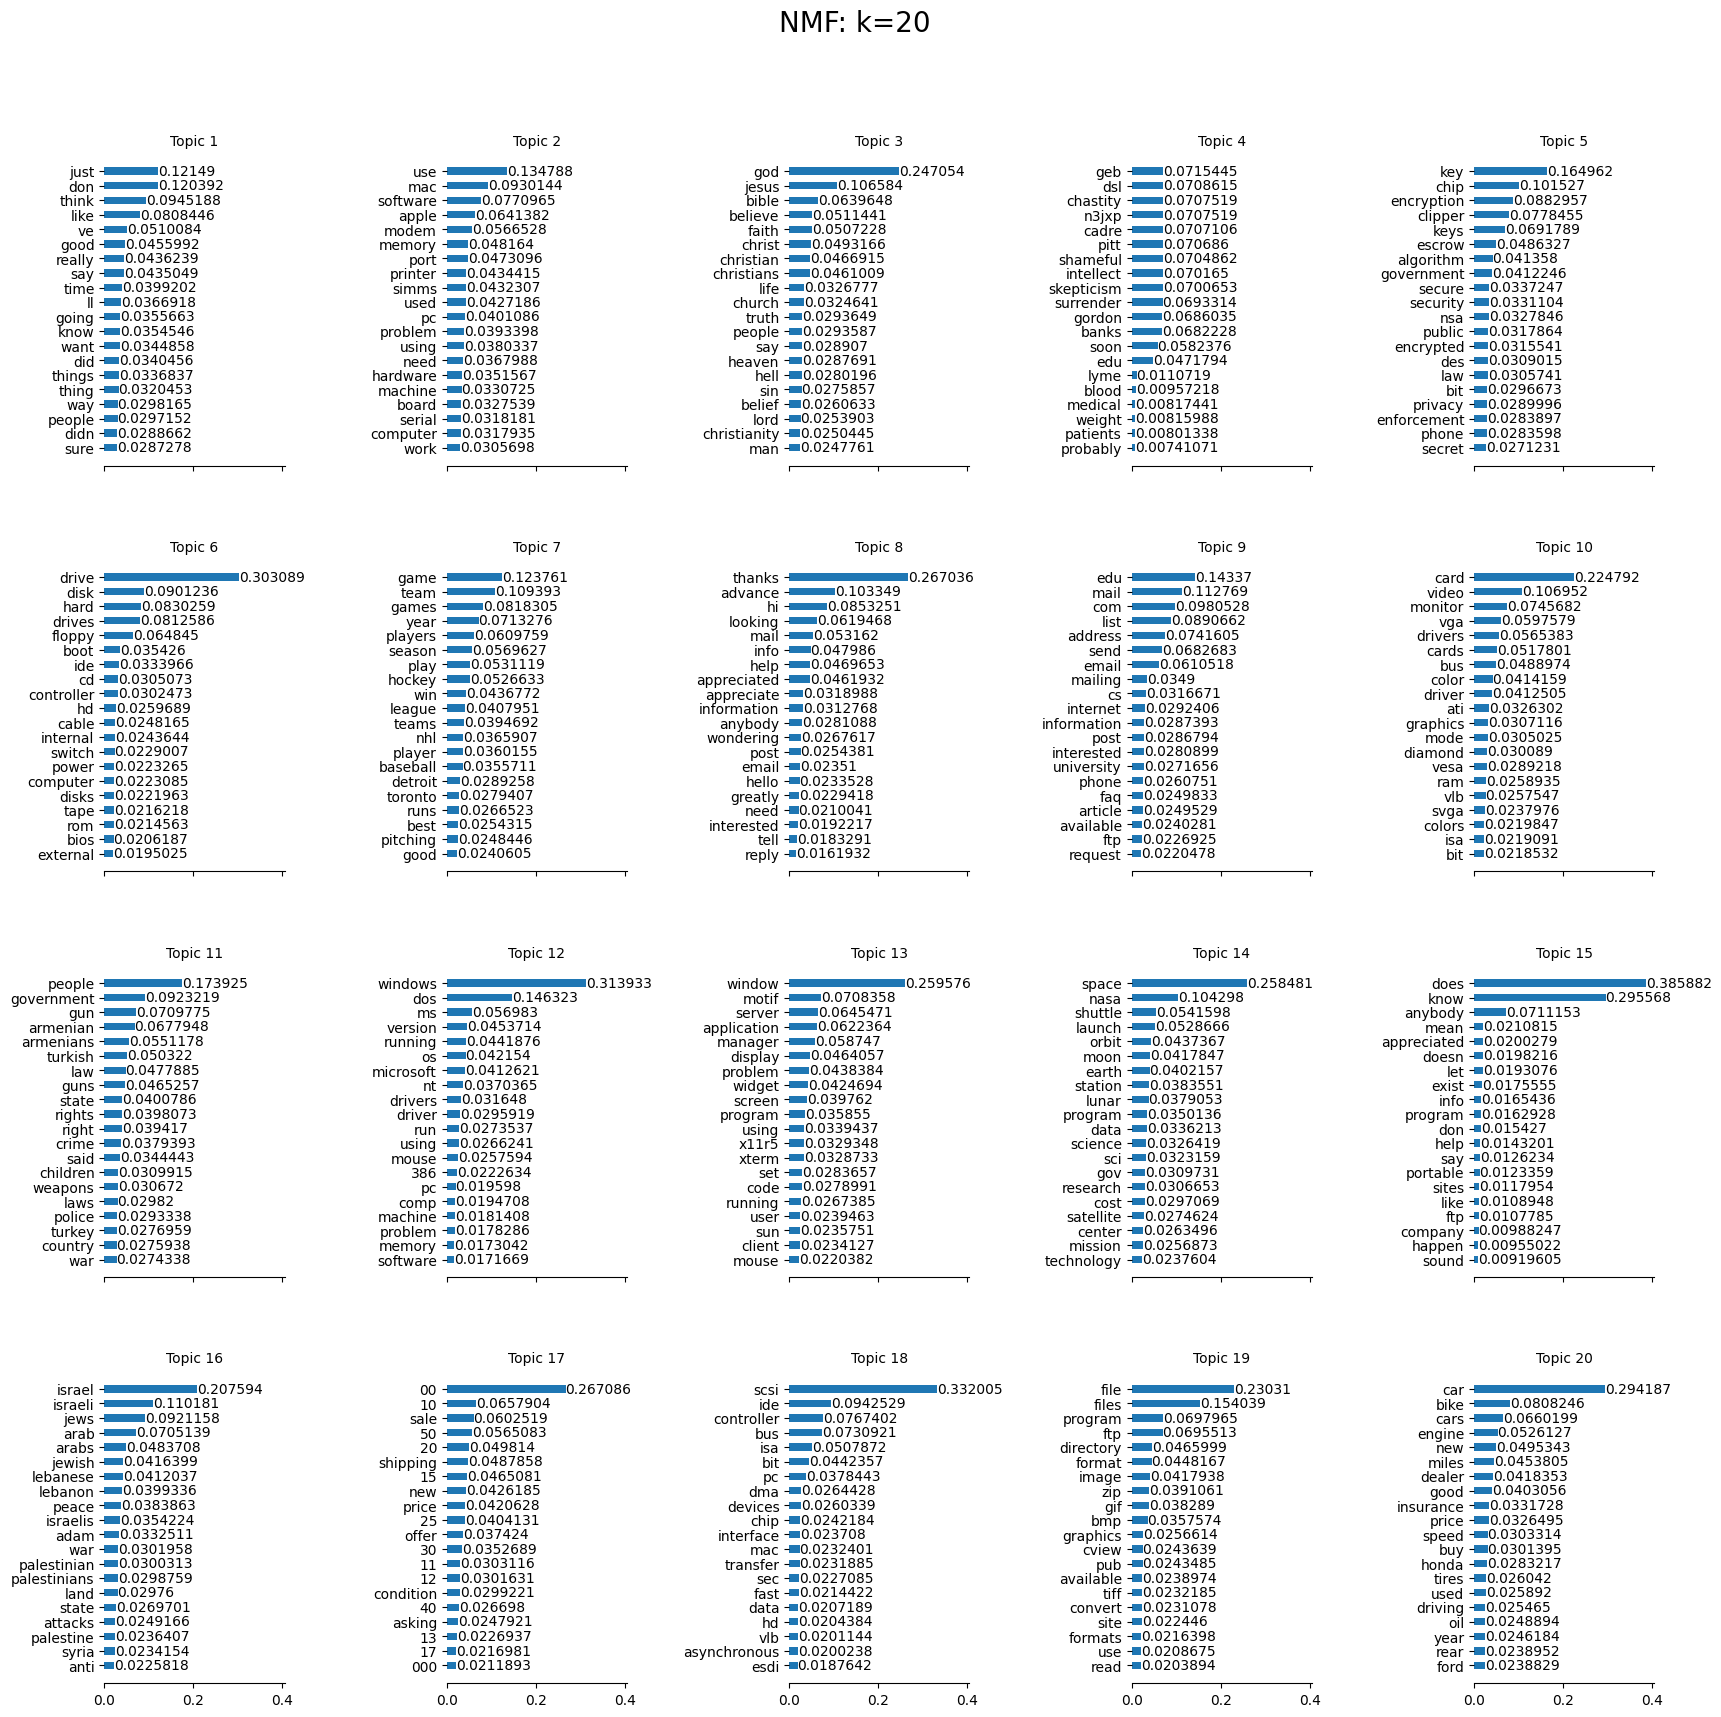

In [36]:
num_topics = 20
nmf = NMF(n_components=num_topics, random_state=11, beta_loss="frobenius").fit(tfidf)
plot_top_words(nmf, tfidf_feature_names, 20, 'NMF: k=20', 4 , 5, 18)

k=50

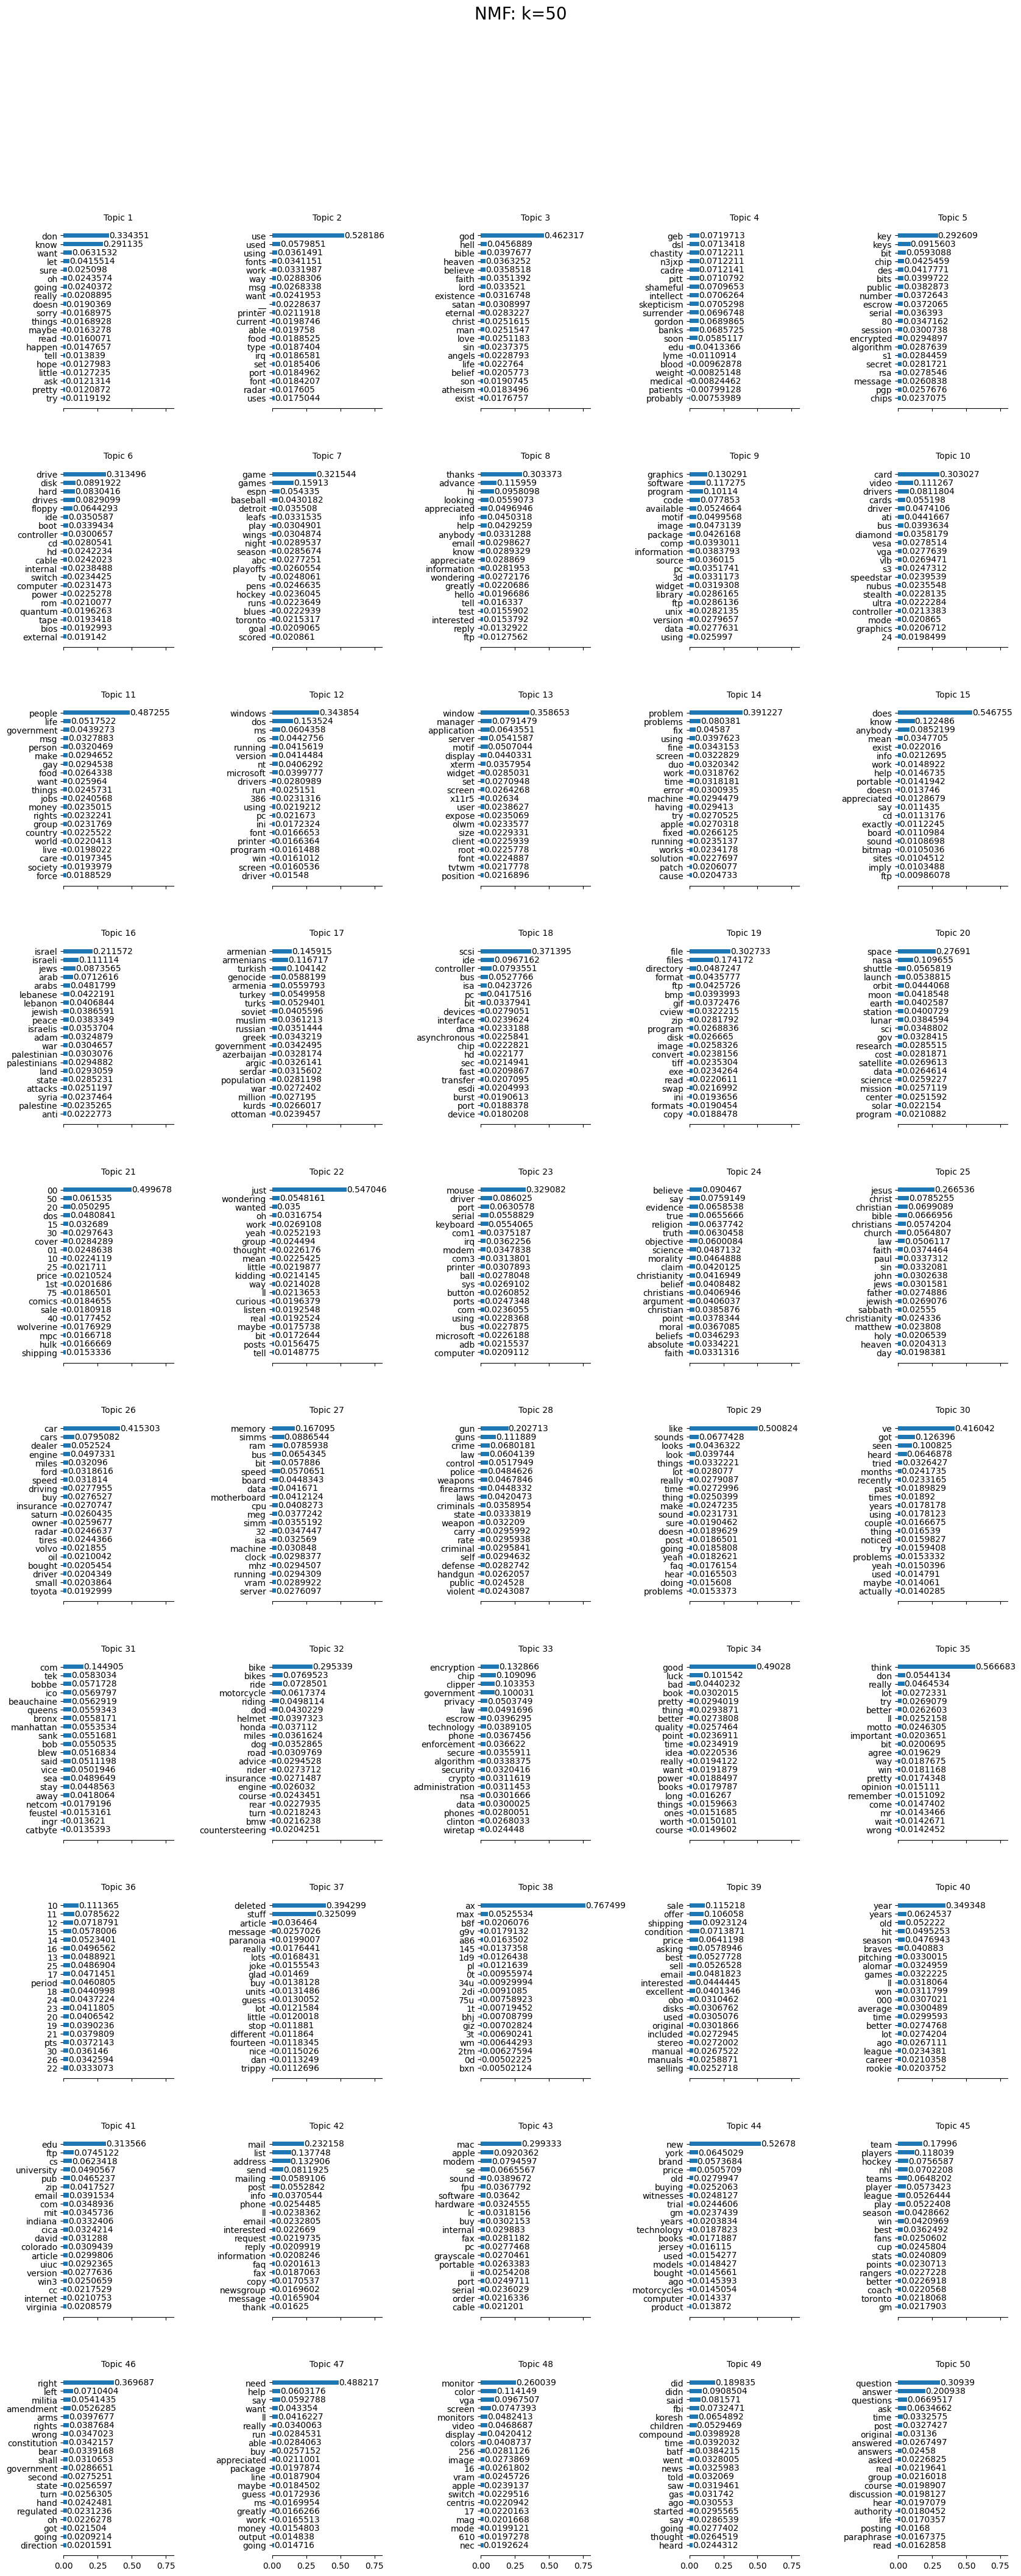

In [37]:
num_topics = 50
nmf = NMF(n_components=num_topics, random_state=11, beta_loss="frobenius").fit(tfidf)
plot_top_words(nmf, tfidf_feature_names, 20, 'NMF: k=50', 10 , 5, 45)

### LDA

k=10

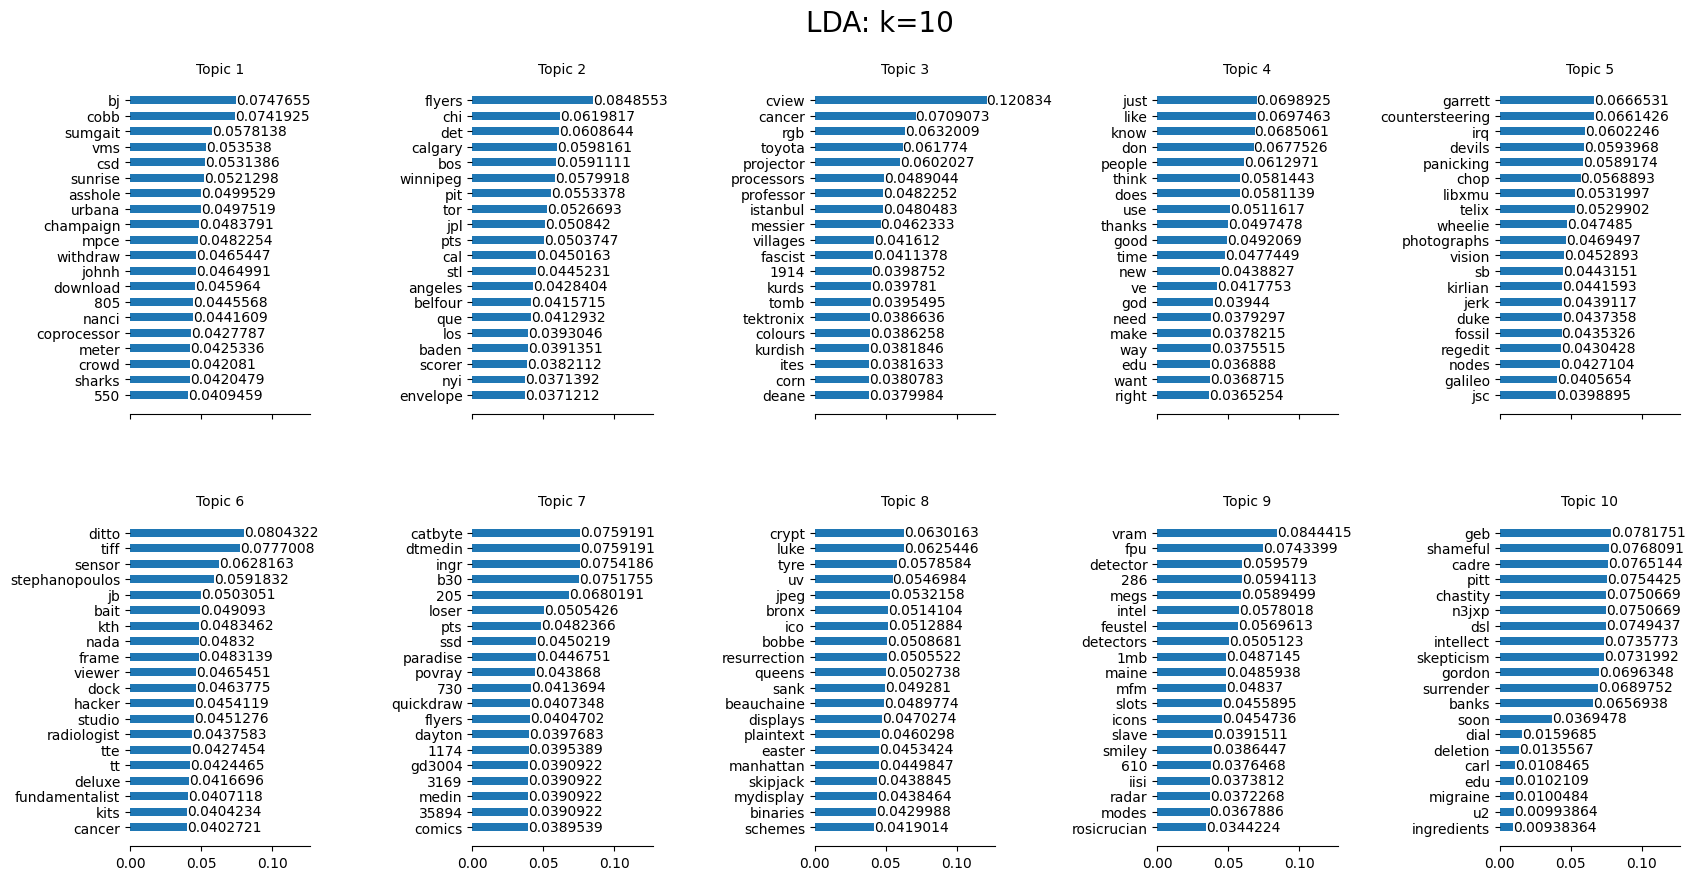

In [38]:
num_topics = 10
lda = LatentDirichletAllocation(n_components=num_topics, random_state=11).fit(tfidf)
plot_top_words(lda, tfidf_feature_names, 20, 'LDA: k=10', 2 , 5, 9)

k=20

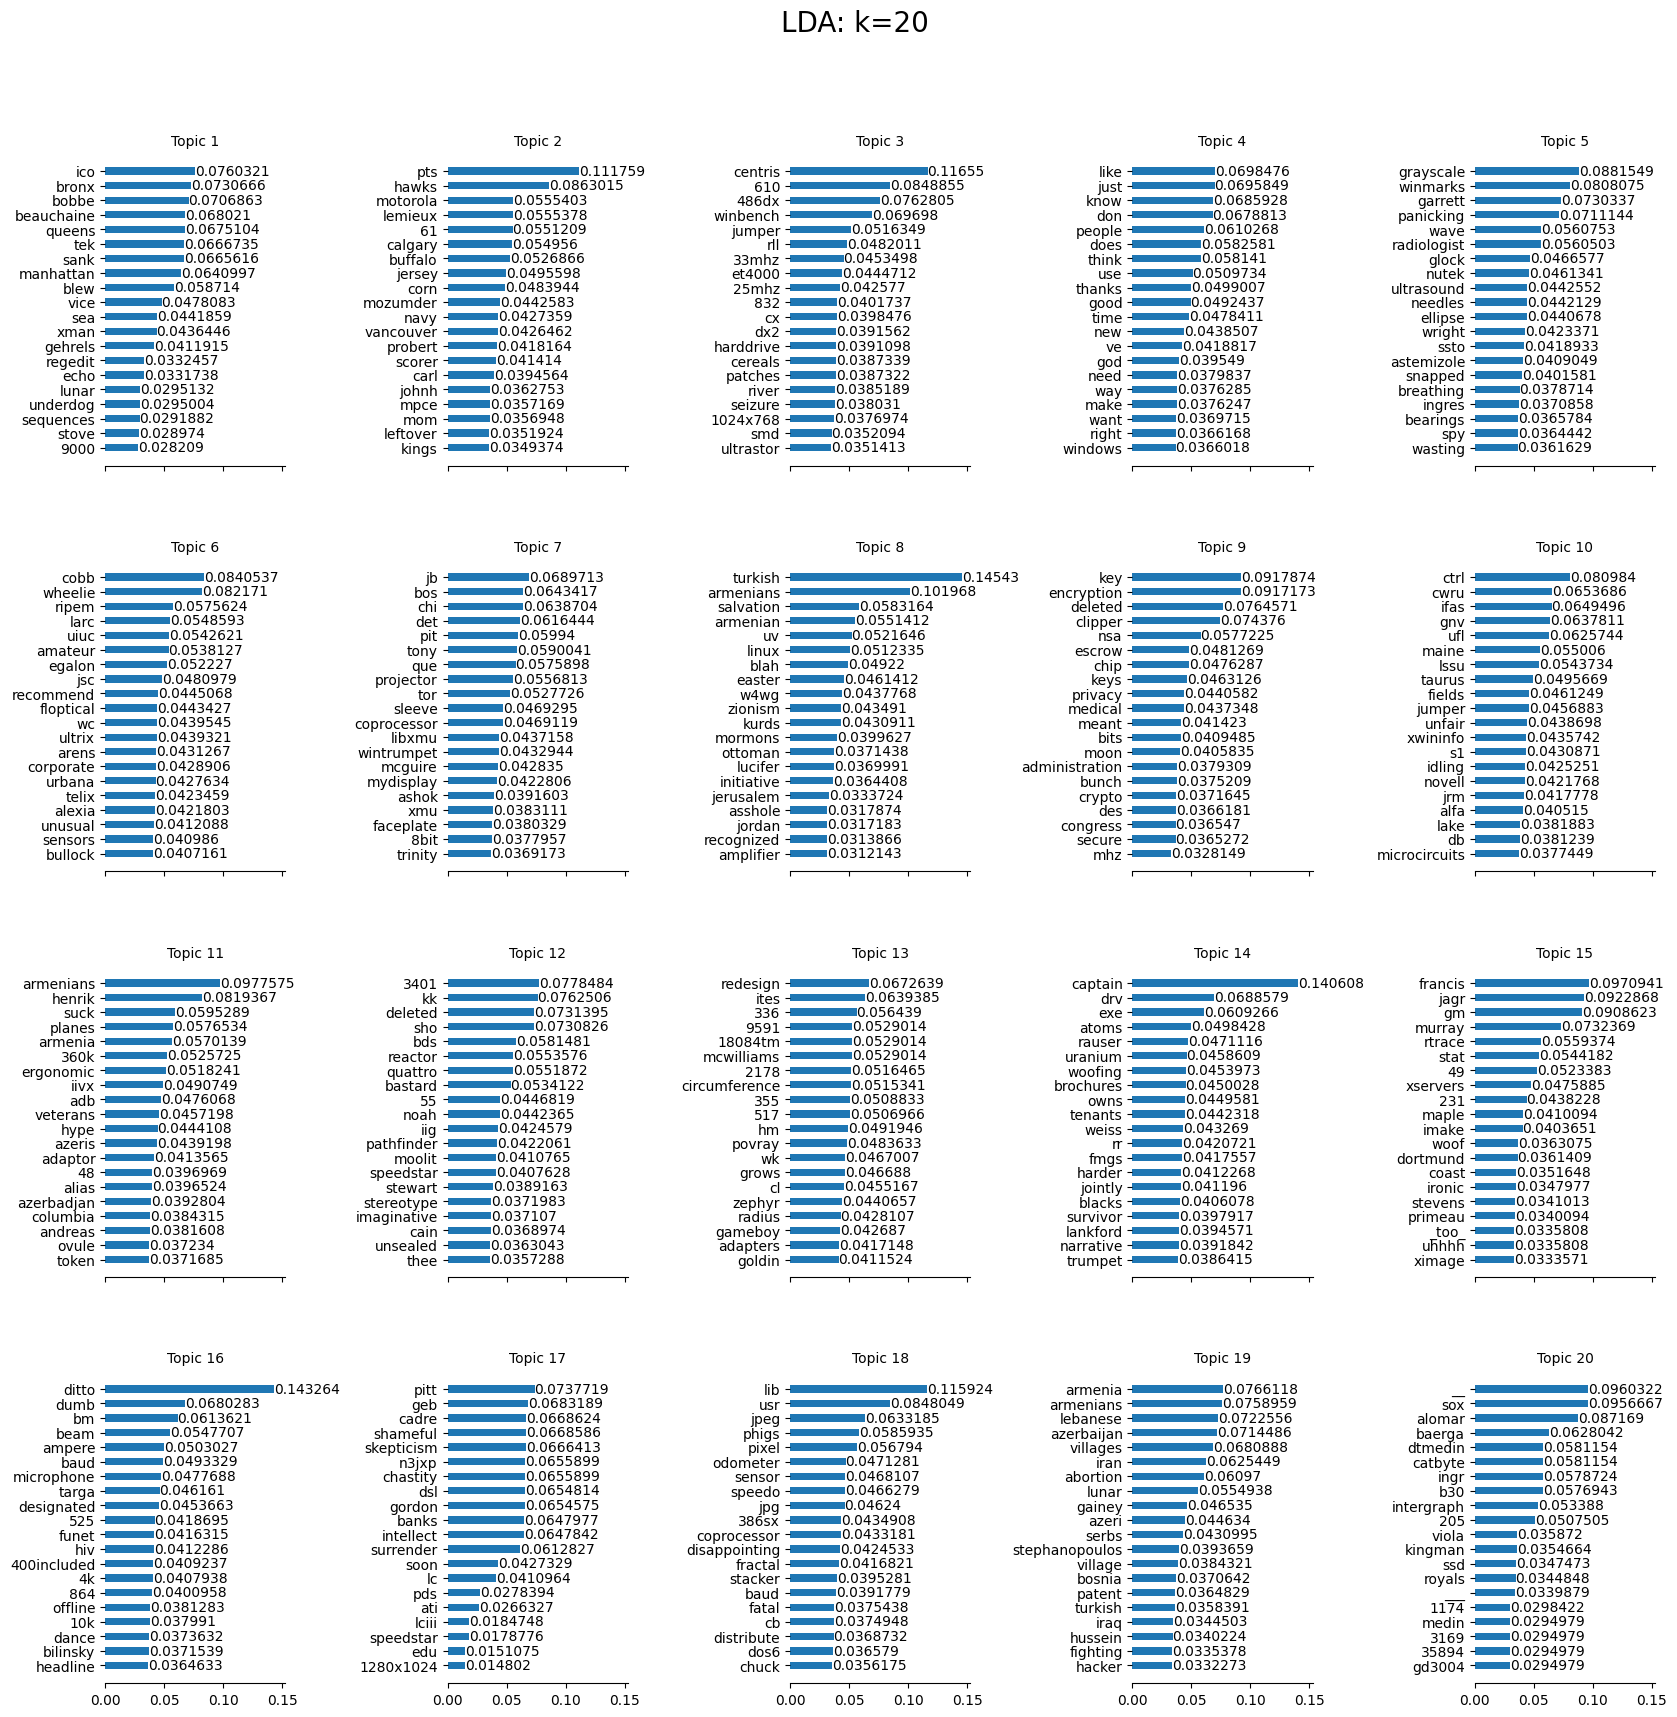

In [39]:
num_topics = 20
lda = LatentDirichletAllocation(n_components=num_topics, random_state=11).fit(tfidf)
plot_top_words(lda, tfidf_feature_names, 20, 'LDA: k=20', 4 , 5, 18)

k=50

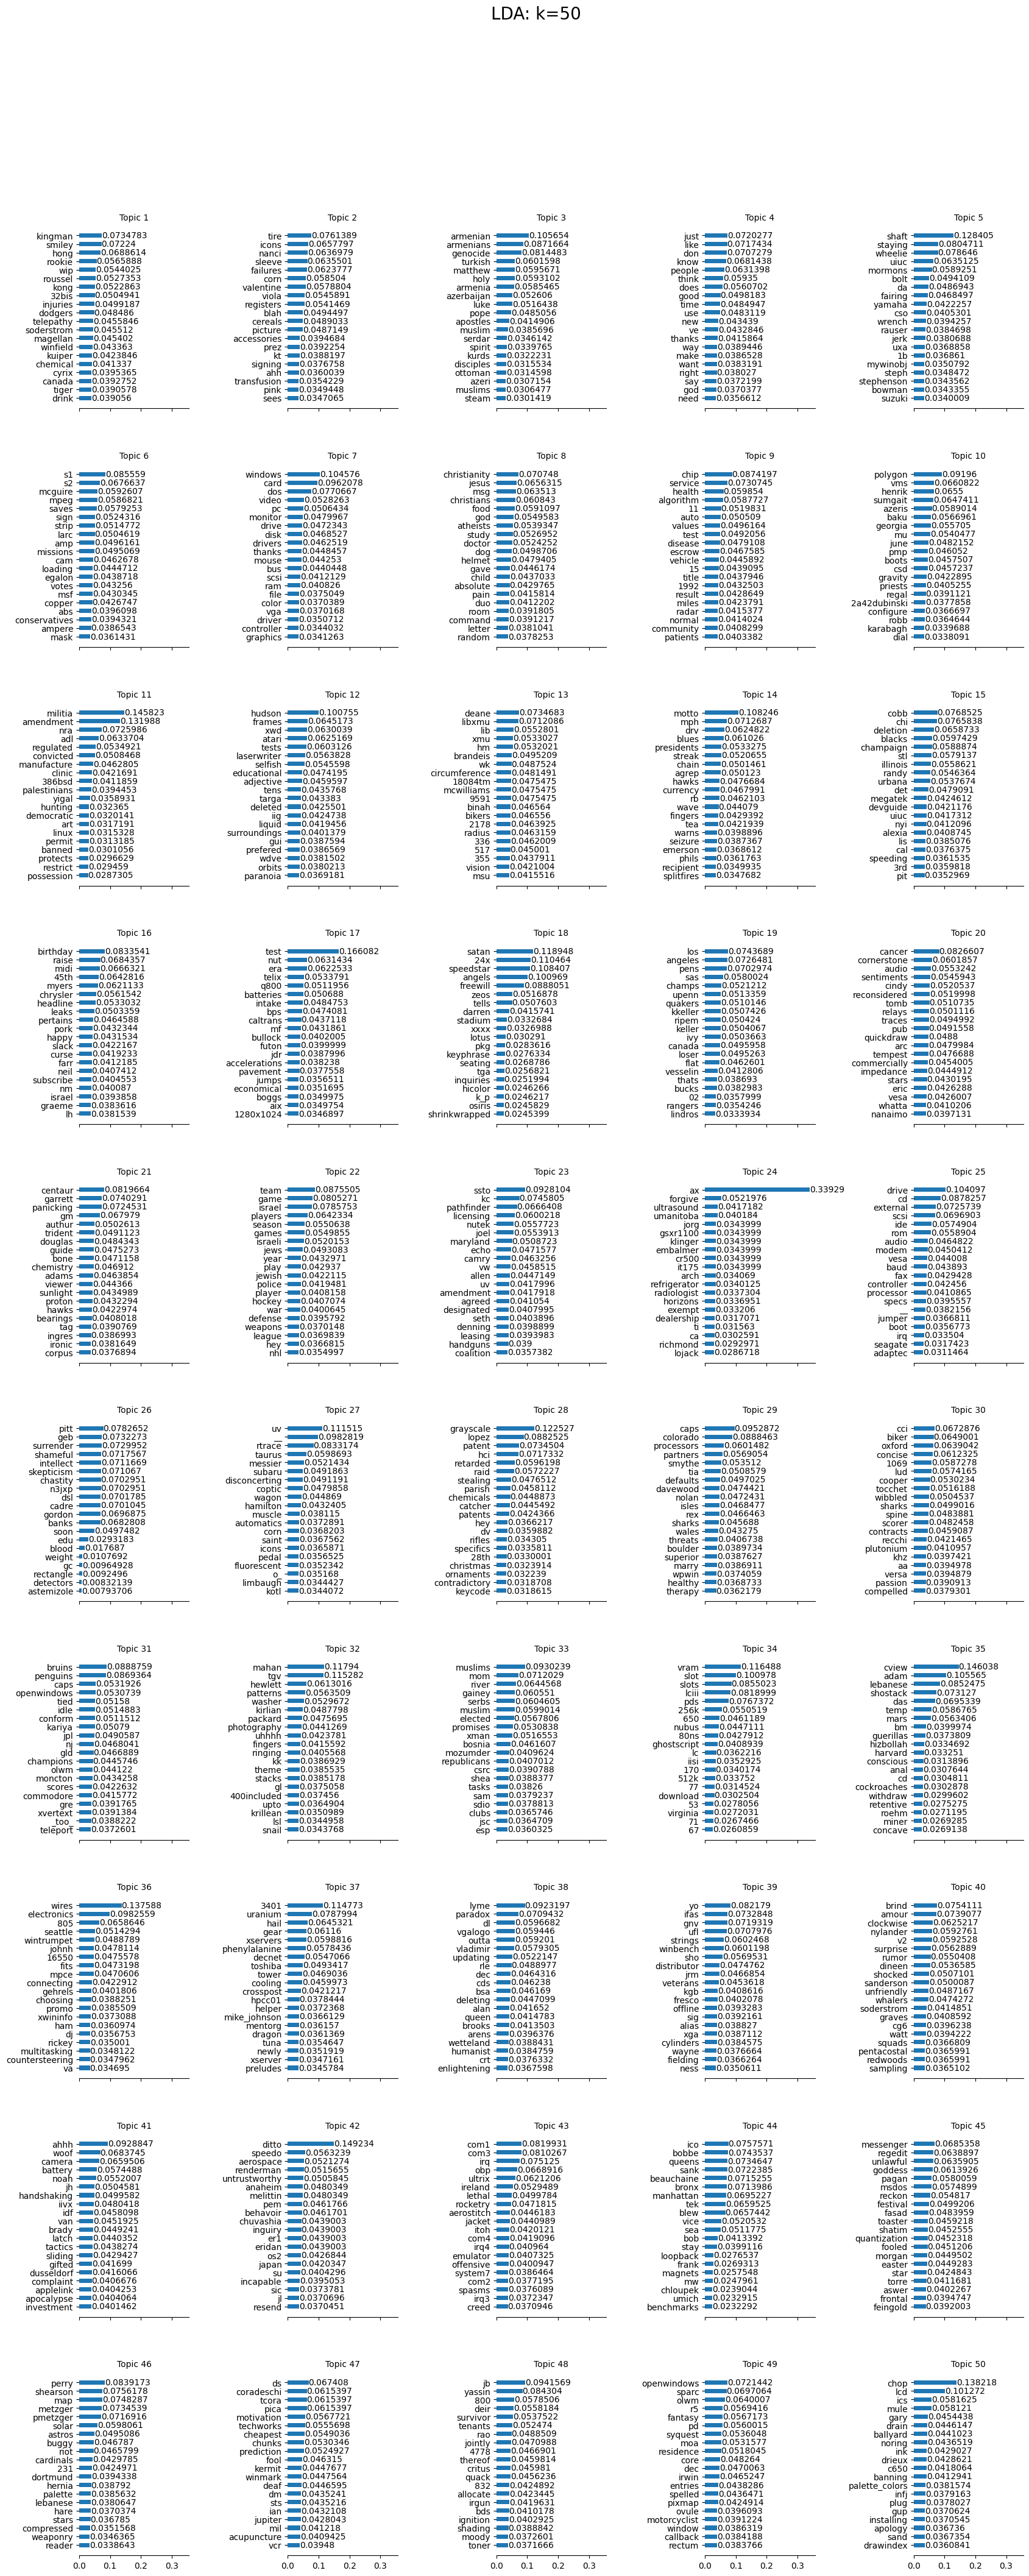

In [40]:
num_topics = 50
lda = LatentDirichletAllocation(n_components=num_topics, random_state=11).fit(tfidf)
plot_top_words(lda, tfidf_feature_names, 20, 'LDA: k=50', 10 , 5, 45)